In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [31]:
# load data
# set-up paths
home_dir = '/Volumes/Data/'
in_path = home_dir+'Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = home_dir+'Emily/figures/fig_2_mapseq/python_out/'


# Load normalized count data - minimum intervention
with open(in_path + 'M194_M220_OMC_separate_all_count.pkl', 'rb') as f:
    omc_count = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_count.pkl', 'rb') as f:
    aca_count = pickle.load(f)

with open(in_path + 'M194_M220_OMC_separate_all_countN.pkl', 'rb') as f:
    omc_countN = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_countN.pkl', 'rb') as f:
    aca_countN = pickle.load(f)

EOFError: Ran out of input

# histograms of bc counts

In [16]:
test.columns

Index(['OB', 'AOMCi', 'POMCi', 'ACAi', 'AOMCc', 'POMCc', 'ACAc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN'],
      dtype='object')

<AxesSubplot: xlabel='AOMCi', ylabel='Count'>

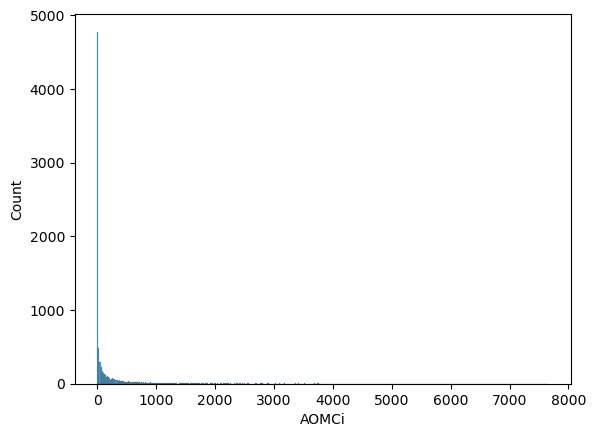

In [33]:
plot = test['AOMCi'].reset_index(drop=True)
plot = plot[plot>0]
sns.histplot(plot)